In [1]:
#Import data
import pandas as pd
DATAFILE = "./prepared_data/join_three_scale.csv"
Purchase_DF = pd.read_csv(DATAFILE)
print(list(Purchase_DF))
# Purchase_DF

['mean_unexpcost', 'median_unexpcost', 'mean_stdcost', 'median_stdcost', 'mean_pocost', 'median_pocost', 'mean_qty', 'median_qty', 'mean_costsave', 'median_costsave', 'mean_spend', 'median_spend', 'mean_return_spend', 'median_return_spend', 'mean_leadtime', 'median_leadtime', 'mean_abc', 'median_abc', 'mean_source', 'median_source', 'Category', 'mean_late', 'median_late', 'mean_early', 'median_early', '%Critical', 'SupplierID', 'quality_risk_mean', 'quality_risk_median', 'delivery_risk_mean', 'delivery_risk_median']


In [2]:
#Select features
PCA_feats = ['mean_unexpcost', 'mean_return_spend', 'mean_qty', 'mean_costsave', 'mean_spend',
             'mean_leadtime','mean_abc', 'mean_source',
             'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
# PCA_feats = ['mean_unexpcost', 'mean_return_spend','mean_spend',
#              'mean_late', 'mean_early','%Critical', 'quality_risk_mean', 'delivery_risk_mean']
Purch_PCA = Purchase_DF[PCA_feats]
Purch_PCA = Purch_PCA.dropna()
x = Purch_PCA

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
x = Purch_PCA
print(x)
# X
# print(X[1,0])

     mean_unexpcost  mean_return_spend  mean_qty  mean_costsave  mean_spend  \
0          2.000000           1.000000  2.000000       2.285714    1.142857   
1          1.700000           1.200000  1.900000       1.900000    1.600000   
2          2.000000           1.000000  2.000000       2.000000    1.000000   
3          1.868421           1.036842  1.078947       2.873684    1.910526   
4          1.888889           1.000000  2.481481       1.666667    1.814815   
5          1.894737           1.000000  1.105263       1.368421    1.631579   
6          1.222222           1.000000  1.000000       2.166667    1.000000   
7          1.200000           1.000000  1.100000       2.000000    1.000000   
8          2.000000           1.000000  1.000000       2.000000    1.000000   
9          1.333333           1.000000  1.000000       2.000000    2.000000   
10         1.818182           1.090909  1.181818       1.954545    1.045455   
11         2.000000           1.000000  1.517241    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


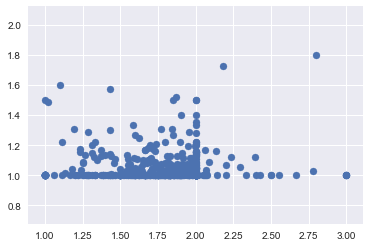

In [5]:
# rng = np.random.RandomState(1)
# X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
X = Purch_PCA.as_matrix()
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)

[[-8.42616697e-02 -2.90857985e-03  4.86289850e-02 -6.59803803e-02
  -4.95448155e-02  2.61039098e-02 -6.10243829e-02 -9.85538212e-01
  -3.14688362e-03  8.36095748e-03 -6.57500545e-02 -8.20999269e-03
   5.96439071e-02]
 [-4.18427502e-02  2.27161427e-02  6.64551967e-02 -1.59818550e-03
   3.35765871e-01  1.85789752e-01  8.97448993e-01 -7.07933475e-02
  -9.67001736e-04  3.89015692e-02  1.82536718e-01  2.35603373e-03
   2.81406761e-02]]
[0.69612786 0.47457118]


In [7]:
# pca=PCA_method(Purch_PCA) 
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (578, 13)
transformed shape: (578, 2)


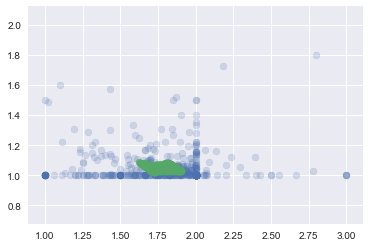

In [8]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [9]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (578, 13)
transformed shape: (578, 1)


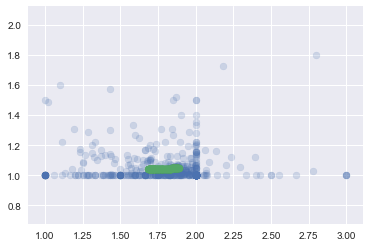

In [10]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [11]:
# from sklearn.datasets import load_digits
# digits = load_digits()
# digits.data.shape

In [12]:
# pca = PCA(6)  # project from 64 to 2 dimensions
# projected = pca.fit_transform(digits.data)
# print(digits.data.shape)
# print(projected.shape)

In [23]:
pca = PCA(6)  # project from 64 to 2 dimensions
projected = pca.fit_transform(x)
print(x.shape)
print(projected.shape)
# print(digits.target)

(578, 13)
(578, 6)


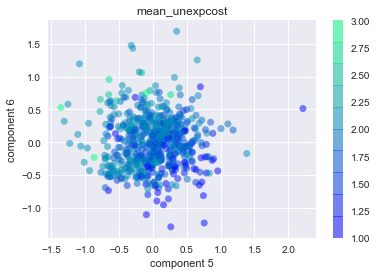

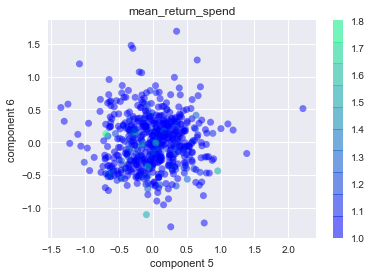

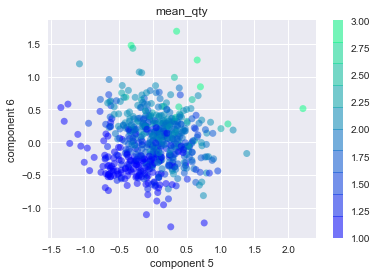

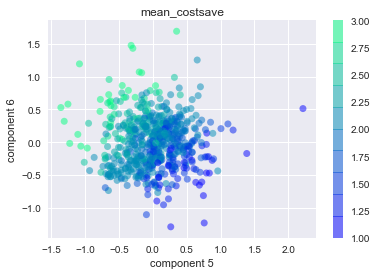

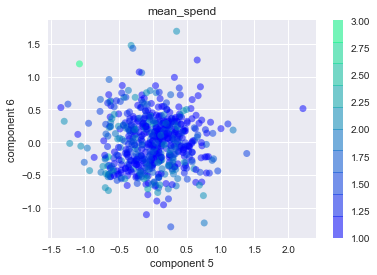

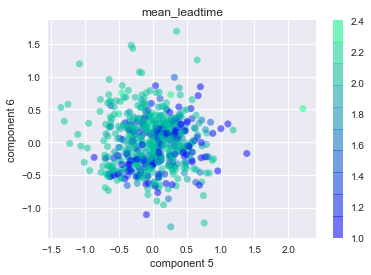

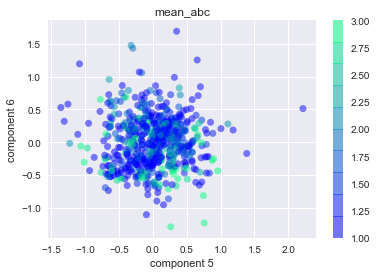

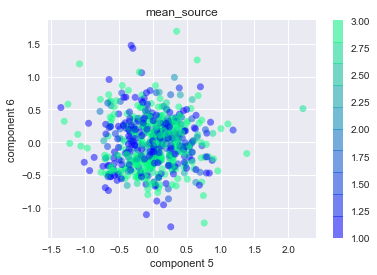

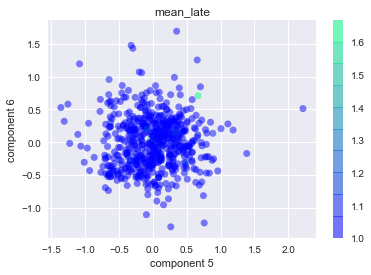

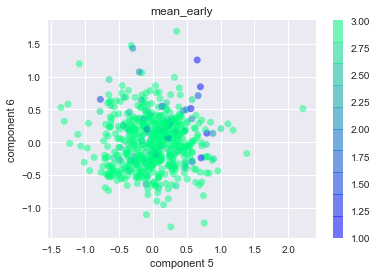

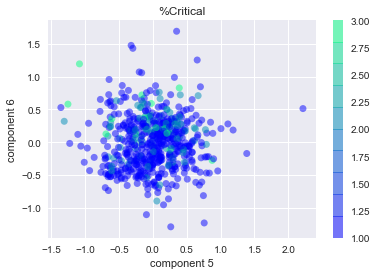

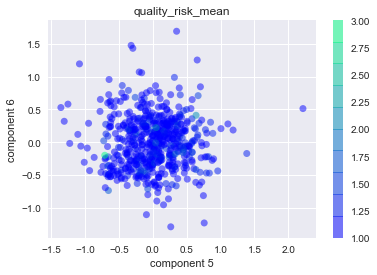

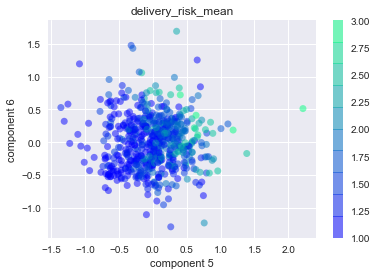

In [27]:
for feat in PCA_feats:
    plt.scatter(projected[:, 4], projected[:, 5],
                c=x[feat], edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('winter', 10))
    plt.xlabel('component 5')
    plt.ylabel('component 6')
    plt.title(feat)
    plt.colorbar();
    fname = "PCA_5_6_" + feat
    plt.savefig(fname)
    plt.show()

In [15]:
# plt.scatter(projected[:, 0], projected[:, 1],
#             c=x['%Critical'], edgecolor='none', alpha=0.5,
#             cmap=plt.cm.get_cmap('winter', 10))
# plt.xlabel('component 1')
# plt.ylabel('component 2')
# plt.colorbar();

In [16]:
# rng = np.random.RandomState(1)
# X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
# plt.scatter(X[:, 0], X[:, 1])
# plt.axis('equal');

# X = x.values
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca.fit(X)

In [17]:
# def draw_vector(v0, v1, ax=None):
#     ax = ax or plt.gca()
#     arrowprops=dict(arrowstyle='->',
#                     linewidth=2,
#                     shrinkA=0, shrinkB=0)
#     ax.annotate('', v1, v0, arrowprops=arrowprops)

# q= pca.mean_
# type(q)
# print(q[0])
# # # plot data
# plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
# for length, vector in zip(pca.explained_variance_, pca.components_):
#     v = vector * 3 * np.sqrt(length)
#     draw_vector(pca.mean_, pca.mean_ + v)
# plt.axis('equal');